In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
le_ocean_proximity= LabelEncoder()
data['le_ocean_proximity'] = le_ocean_proximity.fit_transform(data['ocean_proximity'])

In [4]:
data = data.drop(['ocean_proximity'],axis='columns')

In [5]:
data = data.fillna(data.mean())

In [6]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [7]:
# find neighbour points within the circle of given radius
def range_query(data_points, epsilon, data):
    neighbours = []
    for idx, d in enumerate(data):
        distance = np.linalg.norm(data_points - d)
        if distance <= epsilon and distance != 0:
            neighbours.append(idx)
    return neighbours

In [8]:
def own_dbscan(data, epsilon, minimum_points):
    labels = np.zeros(data.shape[0])  # Initialize labels as 0 (unassigned)
    cluster = 0

    for idx, data_point in enumerate(data):
        if labels[idx] != 0:
            continue  # Point has already been assigned a cluster
        n = range_query(data_point, epsilon, data)
        if len(n) >= minimum_points:
            cluster += 1
            labels[idx] = cluster
            for i in n:
                if labels[i] != 0:
                    continue
                labels[i] = cluster
                # Include border points into the cluster
                border_n = range_query(data[i], epsilon, data)
                if len(border_n) >= minimum_points:
                    n += border_n

    return labels

In [9]:
def silhouette_coefficient(X, labels):
    return silhouette_samples(X, labels)

In [10]:
eps_range = np.arange(0.01, 1.01, 0.03)
min_samples_range = range(3, 21, 3)

for eps in eps_range:
    for min_samples in min_samples_range:
        # Apply your DBSCAN implementation
        labels = own_dbscan(data.values, eps, min_samples)
        
        # Calculate Silhouette Coefficient
        silhouette_scores = silhouette_coefficient(data.values, labels)
        mean_silhouette = np.mean(silhouette_scores)
        
        # Check if this combination is the best
        if mean_silhouette > best_silhouette_score:
            best_silhouette_score = mean_silhouette
            best_eps = eps
            best_min_samples = min_samples
print(f"Best EPS: {best_eps}")
print(f"Best Min Samples: {best_min_samples}")
print(f"Best Silhouette Coefficient: {best_silhouette_score}")

In [11]:
data = data[1:2000,:]

In [12]:
own_labels = own_dbscan(data,0.5,7)

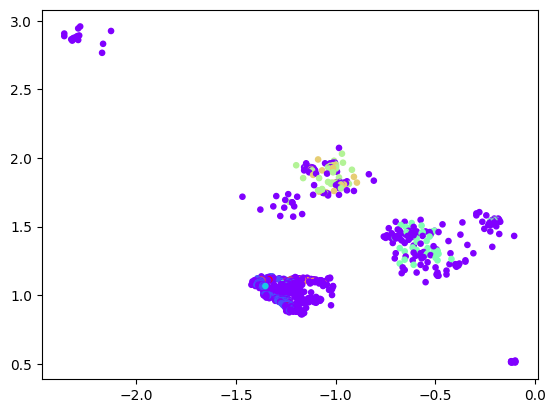

In [13]:
plt.scatter(data[:,0],data[:,1], marker='o', s=14, c=own_labels, cmap='rainbow')

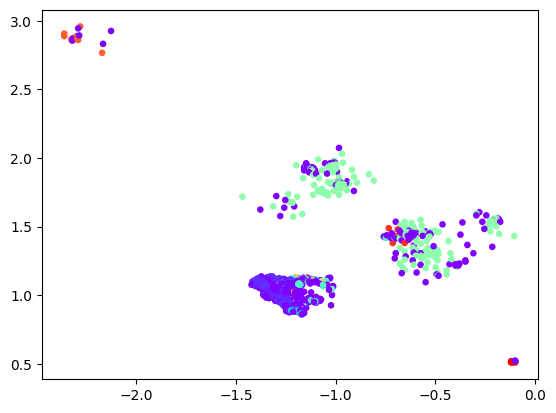

In [14]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.6, min_samples=5).fit(data)
sklearn_labels = db.labels_
sklearn_labels
plt.scatter(data[:,0],data[:,1], marker='o', s=14, c=sklearn_labels, cmap='rainbow')

In [15]:
from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(data,sklearn_labels)
print(sil_avg)

-0.16095467251795986


In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

eps_range = np.arange(0.01, 1.01, 0.03)
min_samples_range = range(3, 21, 3)

best_silhouette_score = -1  # Initialize with a low value

# for eps in eps_range:
for min_samples in min_samples_range:
    labels = own_dbscan(data, 1.0, min_samples)  # Use 'data' directly, not 'data.values'
    
    # Check if all data points are in a single cluster
    if len(np.unique(labels)) == 1:
        continue  # Skip this combination
    
    silhouette_avg = silhouette_score(data, labels)  # Use 'data', not 'data.values'
    
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        # best_eps = eps
        best_min_samples = min_samples

# print(f"Best EPS: {best_eps}")
print(f"Best Min Samples: {best_min_samples}")
print(f"Best Silhouette Coefficient: {best_silhouette_score}")


Best Min Samples: 12
Best Silhouette Coefficient: 0.21411453375037945
